<a href="https://colab.research.google.com/github/yuikateraoka/AI-image/blob/main/flask_keres_cnn_originaldataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip dataset(1).zip

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `unzip dataset(1).zip'


In [ ]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)

import matplotlib
print(matplotlib.__version__)

import platform
print("python " + platform.python_version())

2.4.1
2.4.3
3.2.2
python 3.7.10


In [ ]:
#1 ライブラリのインポート等

import keras
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.utils import plot_model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

In [ ]:
#2 各種設定 

train_data_path = '/content/drive/MyDrive/Colab Notebooks/Meats/train' # ここを変更。Colaboratoryにアップロードしたzipファイルを解凍後の、データセットのフォルダ名を入力

image_size = 28 # ここを変更。必要に応じて変更してください。「28」を指定した場合、縦28横28ピクセルの画像に変換します。

color_setting = 1  #ここを変更。データセット画像のカラー：「1」はモノクロ・グレースケール。「3」はカラー。

folder = ['rare', 'welldone'] # ここを変更。データセット画像のフォルダ名（クラス名）を半角英数で入力

class_number = len(folder)
print('今回のデータで分類するクラス数は「', str(class_number), '」です。')


今回のデータで分類するクラス数は「 2 」です。


In [ ]:
#3 データセットの読み込みとデータ形式の設定・正規化・分割 

X_image = []  
Y_label = [] 
for index, name in enumerate(folder):
  read_data = train_data_path + '/' + name
  files = glob.glob(read_data + '/*.jpg') #ここを変更。png形式のファイルを利用する場合のサンプルです。
  print('--- 読み込んだデータセットは', read_data, 'です。')

  for i, file in enumerate(files):  
    if color_setting == 1:
      img = load_img(file, color_mode = 'grayscale' ,target_size=(image_size, image_size))  
    elif color_setting == 3:
      img = load_img(file, color_mode = 'rgb' ,target_size=(image_size, image_size))
    array = img_to_array(img)
    X_image.append(array)
    Y_label.append(index)

X_image = np.array(X_image)
Y_label = np.array(Y_label)

X_image = X_image.astype('float32') / 255
Y_label = keras.utils.to_categorical(Y_label, class_number)


--- 読み込んだデータセットは /content/drive/MyDrive/Colab Notebooks/Meats/train/rare です。
--- 読み込んだデータセットは /content/drive/MyDrive/Colab Notebooks/Meats/train/welldone です。


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 128)       18560     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 12544)           

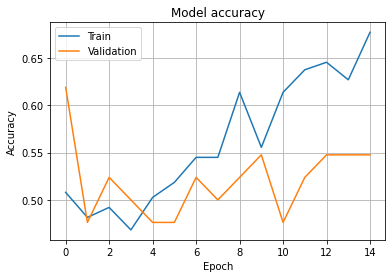

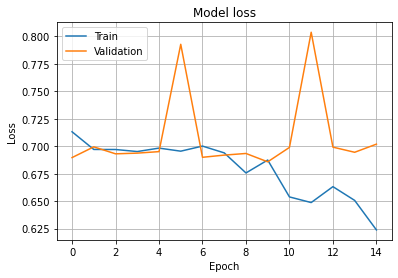

Loss: 0.701863706111908 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 54.76190447807312 % （精度 - 100% に近いほど正解に近い）
Computation time（計算時間）:8.451 sec（秒）


In [ ]:
train_images, valid_images, train_labels, valid_labels = train_test_split(X_image, Y_label, test_size=0.10)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels


#4 機械学習（人工知能）モデルの作成 – 畳み込みニューラルネットワーク（CNN）・学習の実行等

model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(image_size, image_size, color_setting), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))               
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.5))                                   
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                 
model.add(Dense(class_number, activation='softmax'))

model.summary()
plot_model(model, to_file='model.png')

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

start_time = time.time()

# ここを変更。必要に応じて「batch_size=」「epochs=」の数字を変更してみてください。
history = model.fit(x_train,y_train, batch_size=2, epochs=15, verbose=3, validation_data=(x_test, y_test))

#plt.plot(history.history['acc'])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）') 
print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）') 
print('Computation time（計算時間）:{0:.3f} sec（秒）'.format(time.time() - start_time))


# モデル構造と学習済みの重みの保存
model.save('keras_cnn_model_weight_1.h5')

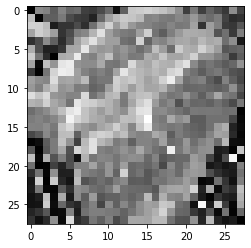

画像認識AIは「 rare 」の確率を 74 % と予測しました。
画像認識AIは「 welldone 」の確率を 25 % と予測しました。
-------------------------------------------------------
画像認識AI：お肉の予測結果は、「 rare 」です。


In [ ]:
#1 ライブラリのインポート等

from keras.models import load_model
import cv2 
import matplotlib.pyplot as plt
import numpy as np


#2 各種設定

recognise_image = '/content/drive/MyDrive/Colab Notebooks/data/test/rare/rare_test1.jpg' #ここを変更。画像認識したい画像ファイル名。（実行前に認識したい画像ファイルを1つアップロードしてください）

folder = ['rare', 'welldone']  #ここを変更。今回は日本語の表示にしたかったので、folder = ['circle', 'cross'] の順番で日本語にしています。

image_size = 28 # ここを変更。「28」を指定した場合、縦28横28ピクセルの画像に変換
                # 「② 用意した自前画像で学習」と同じにする。

color_setting = 3  # ここを変更。画像認識する画像のカラー。「1」はモノクロ・グレースケール。「3」はカラー
                   # 「② 用意した自前画像で学習」と同じにする。

#3 各種読み込み
model = load_model('keras_cnn_model_weight_1.h5') 



#4 画像の表示・各種設定等
img = cv2.imread(recognise_image, 0)  #ここを変更。モノクロ・グレースケールの場合は「0」。カラーの場合は「1」 。         
img = cv2.resize(img, (image_size, image_size))
plt.imshow(img)
plt.gray()  #ここを変更。カラーの場合は「plt.gray()」を消す。モノクロ・グレースケールの場合は「plt.gray()」が無いと変な色になります。
plt.show()

img = img.reshape(image_size, image_size, color_setting).astype('float32')/255 

#5 予測と結果の表示等

prediction = model.predict(np.array([img]))
#prediction = model.predict(np.array([img]))
result = prediction[0]

for i, accuracy in enumerate(result):
  print('画像認識AIは「', folder[i], '」の確率を', int(accuracy * 100), '% と予測しました。')

print('-------------------------------------------------------')
print('画像認識AI：お肉の予測結果は、「', folder[result.argmax()],'」です。')